# Simplest problem: is there a legal move or not?

This is a simplified version in which the model only answers the question whether there is at least one legal move or not.

In [ ]:
from MorpionSolitaire import *
from DeepLearningMS import *

In [ ]:
from multiprocess import Pool
pool = Pool()

## Mini-batches

This function plays one game at random until there are no more moves, stores the grid as `grid1`, then rewinds the game (half of the time rewind just one move, half of the time rewind to an arbitrary interemediate stage), and stores the final grid as `grid2`. The output of the function is a tensor containing the two grids. By construction the first grid has no legal moves and the second one has at least one legal move.

In [ ]:
# def play_one_game(index = 0): # dummy argument needed for passing to pool.map
#     game = NewGame('cross').play()
#     grid1 = torch.FloatTensor(game.grid.image())
#     game = game.unplay(np.random.randint(0, 2) * np.random.randint(0, game.score) + 1)
#     grid2 = torch.FloatTensor(game.grid.image())
#     return torch.unsqueeze(torch.stack((grid1, grid2)), 1)

In [ ]:
def play_one_game(index = 0): # dummy argument needed for passing to pool.map
    game = NewGame('cross').play()
    grid1 = torch.FloatTensor(game.grid.image())
    game = game.unplay(1)
    grid2 = torch.FloatTensor(game.grid.image())
    return torch.unsqueeze(torch.stack((grid1, grid2)), 1)

Mini-batches contains a certain number of grids obtained in the way described above (computed in parallel to gain time), as well as a labels (0 for no legal moves, 1 for at least one legal move).

In [ ]:
def generate_batch(batch_size = 200):
    x = torch.cat(pool.map(play_one_game, range(batch_size // 2)))
    y = torch.tensor([0.,1.]).repeat(batch_size // 2).unsqueeze(1)
    return x, y

In [ ]:
x, y = generate_batch(10)
x.shape, y.shape

(torch.Size([10, 1, 94, 94]), torch.Size([10, 1]))

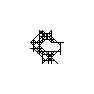

In [ ]:
MSvisualize(x[0])

In [ ]:
y[0]

tensor([0.])

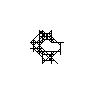

In [ ]:
MSvisualize(x[1])

In [ ]:
y[1]

tensor([1.])

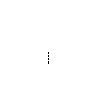

In [ ]:
MSvisualize(x[1]-x[0])

## Data frame

In [ ]:
# data = MSDataFrame(generate_batch, repeat = 3, size = 100)
# data.info()

In [ ]:
data = MSDataFrame(generate_batch, repeat = 1, size = 100)
data.info()

Number of mini-batches stored: 97
Number of times a mini-batch is used: 8
Number of mini-batches created: 97


In [ ]:
# data = MSDataFrame(generate_batch, repeat = 1, size = 25)
# data.info()

## Model and training

In [ ]:
# net = torch.nn.Sequential(
#     torch.nn.Conv2d(1, 40, stride = 3, kernel_size = 13, padding = 0),
#     torch.nn.AdaptiveMaxPool2d(1),
#     torch.nn.Flatten(),
#     torch.nn.ReLU(),
#     torch.nn.Linear(40, 1)
# )

In [ ]:
net = torch.nn.Sequential(
    torch.nn.Conv2d(1, 20, stride = 3, kernel_size = 13, padding = 0),
    torch.nn.AdaptiveMaxPool2d(1),
    torch.nn.Flatten(),
    torch.nn.ReLU(),
    torch.nn.Linear(20, 5),
    torch.nn.ReLU(),
    torch.nn.Linear(5, 1)
)

In [ ]:
# net = torch.nn.Sequential(
#     torch.nn.Conv2d(1, 30, stride = 3, kernel_size = 7, padding = 0),
#     torch.nn.ReLU(),
#     torch.nn.Conv2d(30, 30, stride = 1, kernel_size = 2, padding = 0),
#     torch.nn.AdaptiveMaxPool2d(1),
#     torch.nn.Flatten(),
#     torch.nn.ReLU(),
#     torch.nn.Linear(30, 1)
# )

In [ ]:
y_pred = net(x)

In [ ]:
y_pred.shape

torch.Size([10, 1])

In [ ]:
def accuracy(outputs, labels):
    return ((outputs > 0.5) == labels).float().mean()

In [ ]:
accuracy(y_pred, y)

tensor(0.5000)

In [ ]:
running_loss_data = []
accuracy_data = []

In [ ]:
data.train_model(net, n_epochs = 100, accuracy_func = accuracy,
                 running_loss_data = running_loss_data,
                 accuracy_data = accuracy_data)

/home/marc/anaconda3/lib/python3.8/site-packages/torch/autograd/__init__.py:130: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  Variable._execution_engine.run_backward(


[0]  loss: 0.276   accuracy: 0.49
[1]  loss: 0.250   accuracy: 0.50
[2]  loss: 0.250   accuracy: 0.50
[3]  loss: 0.250   accuracy: 0.51
[4]  loss: 0.250   accuracy: 0.52
[5]  loss: 0.249   accuracy: 0.55
[6]  loss: 0.249   accuracy: 0.54
[7]  loss: 0.249   accuracy: 0.55
[8]  loss: 0.248   accuracy: 0.55
[9]  loss: 0.248   accuracy: 0.57
[10]  loss: 0.247   accuracy: 0.58
[11]  loss: 0.246   accuracy: 0.54
[12]  loss: 0.245   accuracy: 0.56
[13]  loss: 0.244   accuracy: 0.58
[14]  loss: 0.243   accuracy: 0.57
[15]  loss: 0.241   accuracy: 0.57
[16]  loss: 0.239   accuracy: 0.60
[17]  loss: 0.238   accuracy: 0.58
[18]  loss: 0.236   accuracy: 0.62
[19]  loss: 0.233   accuracy: 0.67
[20]  loss: 0.220   accuracy: 0.63
[21]  loss: 0.213   accuracy: 0.69
[22]  loss: 0.207   accuracy: 0.67
[23]  loss: 0.204   accuracy: 0.69
[24]  loss: 0.200   accuracy: 0.65
[25]  loss: 0.199   accuracy: 0.67
[26]  loss: 0.198   accuracy: 0.71
[27]  loss: 0.196   accuracy: 0.67
[28]  loss: 0.194   accuracy: 

In [ ]:
# torch.save(net.state_dict(), 'models/AI_predict_1_v1.pkl')

In [ ]:
data.info()

Number of mini-batches stored: 97
Number of times a mini-batch is used: 8
Number of mini-batches created: 1309


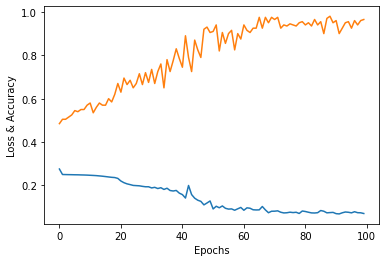

In [ ]:
plt.plot(running_loss_data)
plt.plot(accuracy_data)
plt.xlabel('Epochs')
plt.ylabel('Loss & Accuracy')
plt.show()

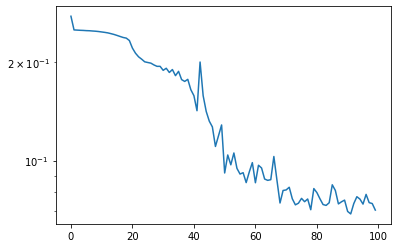

In [ ]:
plt.plot(running_loss_data)
plt.yscale('log')

## Validation

In [ ]:
x, y = generate_batch(1000)

In [ ]:
y_preds = net(x).data

In [ ]:
accuracy(y_preds, y)

tensor(0.9470)

In [ ]:
y.mean(), y.std(), y_preds.mean(), y_preds.std()

(tensor(0.5000), tensor(0.5003), tensor(0.4313), tensor(0.4135))

In [ ]:
mistakes = []
for i in range(y.shape[0]):
    if (y_preds[i] > 0.5) != y[i]:
        mistakes.append([y[i].item(), y_preds[i].item()])
mistakes

[[1.0, 0.1939786672592163],
 [1.0, 0.1781841516494751],
 [1.0, 0.10411787033081055],
 [0.0, 0.6403993368148804],
 [1.0, -0.04098403453826904],
 [1.0, 0.3716503381729126],
 [1.0, 0.08344447612762451],
 [1.0, 0.26998257637023926],
 [0.0, 0.5430108308792114],
 [0.0, 0.5331597328186035],
 [1.0, 0.40188074111938477],
 [1.0, 0.43648552894592285],
 [1.0, 0.35798585414886475],
 [1.0, 0.301624059677124],
 [1.0, -0.04152965545654297],
 [0.0, 0.6657967567443848],
 [1.0, 0.4105757474899292],
 [1.0, 0.40902745723724365],
 [1.0, 0.12361407279968262],
 [1.0, 0.012870311737060547],
 [1.0, 0.37364351749420166],
 [1.0, 0.12361407279968262],
 [1.0, 0.012870311737060547],
 [1.0, 0.0332871675491333],
 [0.0, 0.5032123327255249],
 [0.0, 0.6826825141906738],
 [1.0, 0.15880119800567627],
 [1.0, 0.26998257637023926],
 [0.0, 0.5430108308792114],
 [0.0, 0.5331597328186035],
 [1.0, 0.40188074111938477],
 [1.0, 0.43648552894592285],
 [1.0, 0.2820279598236084],
 [0.0, 0.6191864013671875],
 [1.0, 0.16252994537353516]

label: 1  prediction: 0.1940


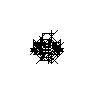

In [ ]:
for i in range(y.shape[0]):
    if (y_preds[i] > 0.5) != y[i]:
        xmistake = x[i]
        print('label: %d  prediction: %.4f' %
              (y[i], y_preds[i]))
        break
MSvisualize(xmistake)

## Network details

In [ ]:
params = net.parameters()

In [ ]:
params = []
for param in net.parameters():
    params.append(param.data)
    print(param.size())

torch.Size([20, 1, 13, 13])
torch.Size([20])
torch.Size([5, 20])
torch.Size([5])
torch.Size([1, 5])
torch.Size([1])


In [ ]:
def divisors(x):
    i = np.round(np.sqrt(x)).astype(int)
    for j in range(i - 1):
        if x % (i - j) == 0:
            n = x // (i - j)
            return (n, x // n)
    return (x, 1)

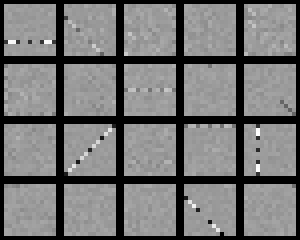

In [ ]:
par = np.array(params[0].squeeze())
par *= -1.0
par = par - np.min(par)
par = par / np.max(par)
par = np.round(255 * par)
w, h = divisors(par.shape[0])
im = np.zeros((15 * h, 15 * w), dtype = int)
for i in range(h):
    for j in range(w):
        im[15*i+1:15*i+14,15*j+1:15*j+14] = par[w*i + j]
Image.fromarray(np.uint8(im), 'L').resize((w*60, h*60), resample=0, box=None)

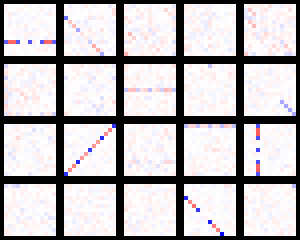

In [ ]:
par = params[0].squeeze()
par /= torch.max(torch.abs(par))
blue = torch.tensor([1,1,0]).unsqueeze(1).unsqueeze(2)
red = torch.tensor([0,1,1]).unsqueeze(1).unsqueeze(2)
par = (blue * torch.where(par > 0, par, 0.0 * par).unsqueeze(1)
       + red * torch.where(par < 0, -1.0 * par, 0.0 * par).unsqueeze(1))
par = np.round(255 * par)
par = np.array(par).astype(int)
w, h = divisors(par.shape[0])
im = np.zeros((15 * h, 15 * w, 3), dtype = int)
for i in range(h):
    for j in range(w):
        for c in range(3):
            im[15*i+1:15*i+14,15*j+1:15*j+14,c] = 255 - par[w*i + j, c]
Image.fromarray(np.uint8(im), 'RGB').resize((w*60, h*60), resample=0, box=None)